## Importing libraries and files

In [1]:
import pandas as pd
from keras.models import load_model
import pickle
import numpy as np
import matplotlib.pyplot as plt

ann_arr = load_model('Arrival_time/Arrival_ANN_model_3.h5')
ann_end = load_model('End_time/End_ANN_model_8.h5')
ann_chg = load_model('Change_time/Change_ANN_model_3.h5')
#Section1
#ann1 = pickle.load(open('Pressure_profiles_codes_section_1_regression/ANN_1.h5', 'rb'))
#sc1 = pickle.load(open('Pressure_profiles_codes_section_1_regression/scaler_ann.pkl', 'rb'))
#Section2
#ann2 = pickle.load(open('Pressure_profiles_codes_section_2_regression/ANN_1.h5', 'rb'))
#sc2 = pickle.load(open('Pressure_profiles_codes_section_2_regression/scaler_ann.pkl', 'rb'))
#Section3
#ann3 = pickle.load(open('Pressure_profiles_codes_section_3_regression/ANN_1.h5', 'rb'))
#sc3 = pickle.load(open('Pressure_profiles_codes_section_3_regression/scaler_ann.pkl', 'rb'))
#Section4
#ann4 = pickle.load(open('Pressure_profiles_codes_section_4_regression/ANN_1.h5', 'rb'))
#sc4 = pickle.load(open('Pressure_profiles_codes_section_4_regression/scaler_ann.pkl', 'rb'))
#Section5
#ann5 = pickle.load(open('Pressure_profiles_codes_section_5_regression/ANN_1.h5', 'rb'))
#sc5 = pickle.load(open('Pressure_profiles_codes_section_5_regression/scaler_ann.pkl', 'rb'))

## Input details

In [2]:
charge_mass = 20
time = 0.005
atm_pressure = 101200
domain_min = -5
domain_max = 5
mesh_size = 400

In [3]:
x_vals = np.linspace(domain_min, domain_max, mesh_size)
y_vals = np.linspace(domain_min, domain_max, mesh_size)
X, Y = np.meshgrid(x_vals, y_vals)
#generate standoff distances
Z = np.sqrt(X**2 + Y**2)
#reshape Z
c_d = Z.reshape(-1)
c_d = c_d.reshape(len (c_d), 1)

(400, 400)
[[7.07106781]
 [7.0533681 ]
 [7.03571314]
 ...
 [7.03571314]
 [7.0533681 ]
 [7.07106781]]
(160000, 1)
value 7.000538830866007


In [4]:
#Charge mass array
c_m = np.repeat(charge_mass, len(c_d)).reshape(len(c_d),1)
#Time array
c_t = np.repeat(time, len(c_d)).reshape(len(c_d),1)
c_arr = np.concatenate ((c_m, c_d), axis = 1)
#predict change, arrival and end times
change_time = ann_chg.predict(c_arr)
arrival_time = ann_arr.predict(c_arr)
end_time = ann_end.predict(c_arr)

(160000, 1)
[[20]
 [20]
 [20]
 ...
 [20]
 [20]
 [20]]
(160000, 1)
[[0.005]
 [0.005]
 [0.005]
 ...
 [0.005]
 [0.005]
 [0.005]]


In [8]:
#define phase change
if time < change_time[0]:
    c_ph = np.array([[0, 1]])
else:
    c_ph = np.array([[1, 0]])
    
positive = np.array([0, 1])
negative = np.array([1, 0])
for c_time in change_time[1:]:
    if time < c_time:
        c_ph=np.vstack((c_ph,positive))
    else:
        c_ph=np.vstack((c_ph,negative))

[3.20434666]
[3.20258194]
[3.20101247]
[3.19963857]
[3.19846046]
[3.19747837]
[3.19669249]
[3.19610294]
[3.19570986]
[3.19551329]
[3.19551329]
[3.19570986]
[3.19610294]
[3.19669249]
[3.19747837]
[3.19846046]
[3.19963857]
[3.20101247]
[3.20258194]
[3.20434666]
[3.20415063]
[3.20061999]
[3.19728192]
[3.19413702]
[3.19118586]
[3.18842898]
[3.18586688]
[3.18350004]
[3.18132889]
[3.17935383]
[3.17757523]
[3.17599341]
[3.17460867]
[3.17342127]
[3.17243143]
[3.17163934]
[3.17104514]
[3.17064895]
[3.17045083]
[3.17045083]
[3.17064895]
[3.17104514]
[3.17163934]
[3.17243143]
[3.17342127]
[3.17460867]
[3.17599341]
[3.17757523]
[3.17935383]
[3.18132889]
[3.18350004]
[3.18586688]
[3.18842898]
[3.19118586]
[3.19413702]
[3.19728192]
[3.20061999]
[3.20415063]
[3.20473869]
[3.20003117]
[3.19551329]
[3.19118586]
[3.18704965]
[3.1831054]
[3.17935383]
[3.17579563]
[3.17243143]
[3.16926187]
[3.16628753]
[3.16350895]
[3.16092666]
[3.15854113]
[3.15635281]
[3.15436211]
[3.1525694]
[3.15097503]
[3.1495793]
[3

In [9]:
def find_section(c_d):
    c_s = np.array([])
    for distance in c_d:
        if 1 <= distance <= 7:
            c_s = np.append(c_s,1)
        elif 7 < distance <= 13:
            c_s = np.append(c_s,2)
        elif 13 < distance <= 19:
            c_s = np.append(c_s,3)
        elif 19 < distance <= 25:
            c_s = np.append(c_s,4)
        elif 25 < distance <= 30:
            c_s = np.append(c_s,5)
        else:
            print ('out of trained range')
    return c_s
c_s = find_section (c_d)            
c_arr_2 = np.concatenate ((c_m, c_d, c_t, c_ph, c_s), axis = 1)

for index, row in enumerate(c_arr_2):
    

c_arr_2[:,0:3] = sc.transform(c_arr_2[:,0:3])
c_p = regressor.predict(c_arr_2)
print (c_p)
c_p = c_p.reshape(len (c_p), 1)
print (c_p)
print (len(c_p))

[252284.16 252284.16 252284.16 ... 252284.16 252284.16 252284.16]
[[252284.16]
 [252284.16]
 [252284.16]
 ...
 [252284.16]
 [252284.16]
 [252284.16]]
160000


In [10]:
print (time)

0.005


In [10]:
for index, (c_pressure,  c_arrival, c_end) in enumerate(zip(c_p, arrival_time, end_time)):
    if time < c_arrival:
        #print (c_arrival)
        c_p[index] = atm_pressure
        
    elif time > c_end:
        print (c_end)
        c_p[index] = atm_pressure

In [12]:
c_p = c_p.reshape(400, 400)
print (c_p)

[[101200. 101200. 101200. ... 101200. 101200. 101200.]
 [101200. 101200. 101200. ... 101200. 101200. 101200.]
 [101200. 101200. 101200. ... 101200. 101200. 101200.]
 ...
 [101200. 101200. 101200. ... 101200. 101200. 101200.]
 [101200. 101200. 101200. ... 101200. 101200. 101200.]
 [101200. 101200. 101200. ... 101200. 101200. 101200.]]


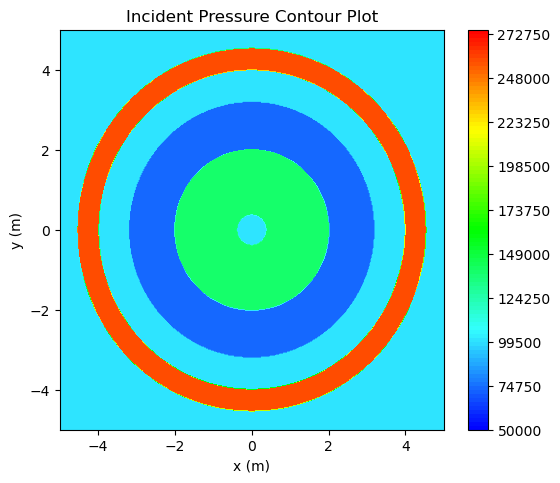

In [13]:
import matplotlib
from scipy.interpolate import griddata

cdict = {'red': ((0.0, 0.0, 0.0),
                 (0.25, 0.2, 0.2),
                 (0.5, 0.0, 0.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 1.0, 1.0)),
        'green':((0.0, 0.0, 0.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 1.0, 1.0),
                 (0.75, 1.0, 1.0),
                 (1.0, 0.0, 0.0)),
        'blue': ((0.0, 1.0, 1.0),
                 (0.25, 1.0, 1.0),
                 (0.5, 0.0, 0.0),
                 (0.75, 0.0, 0.0),
                 (1.0, 0.0, 0.0))}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

#rng = np.random.default_rng()
#points = rng.random((1000, 2))

#c_p_interpolate = griddata(points, c_p, (X,Y), method = 'linear')

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])
levels = np.linspace(50000, 275000, 101)
cp = plt.contourf(X, Y, c_p, levels= levels, cmap = my_cmap) # c_p_interpolate
plt.colorbar(cp)

ax.set_title('Incident Pressure Contour Plot')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()